## Resumen de la revisión 1 <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien hecho Sergio, has completado el notebook. En general tu desarrollo en la parte de los modelos está bien, pero la primera parte de exploración de la data está incompleta. Revisa los comentarios que dejé y corrige/agrega lo necesario.
    
Saludos!    

</div>

## Resumen de la revisión 2 <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Muy bien con las correcciones Sergio, pero faltó revisar por los valores anómalos en las columnas de la data. Es importante que la data esté limpia antes de pasar a los modelos. Corrige este detalle y pasaremos a revisar los resultados de los modelos.
    
Saludos!    

</div>

## Resumen de la revisión 3 <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor v3</b> <a class="tocSkip"></a>

Bien hecho Sergio, tu notebook está casi terminado. El último comentario que tengo es acerca de la forma que se realizaron las imputaciones, por favor revisa mis comentarios de esa parte.
    
Saludos!    

</div>

## Resumen de la revisión 4 <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v4</b> <a class="tocSkip"></a>

Bien hecho Sergio, has completado correctamente todo lo necesario del notebook. No tengo comentarios de corrección adicionales, está aprobado.

Saludos!

</div>

---

El servicio de venta de autos usados Rusty Bargain está desarrollando una aplicación para atraer nuevos clientes. Gracias a esa app, puedes averiguar rápidamente el valor de mercado de tu coche. Tienes acceso al historial: especificaciones técnicas, versiones de equipamiento y precios. Tienes que crear un modelo que determine el valor de mercado.
A Rusty Bargain le interesa:
- la calidad de la predicción;
- la velocidad de la predicción;
- el tiempo requerido para el entrenamiento

## Preparación de datos

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, VotingClassifier
import lightgbm as lgb
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df = pd.read_csv('/datasets/car_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [3]:
display(df.head())

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien al mostrar parte de la data, pero te recomiendo usar `display()` para mostrar un dataframe, da mejor formato de output que `print()`. Por ejemplo, en vez de usar `print(df.head())`, usa `display(df.head())`.

</div>

In [4]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [5]:
null_df = df.isna().sum()
print(null_df)

DateCrawled              0
Price                    0
VehicleType          37484
RegistrationYear         0
Gearbox              19830
Power                    0
Model                19701
Mileage                  0
RegistrationMonth        0
FuelType             32889
Brand                    0
NotRepaired          71145
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64


In [6]:
df_1 = df.copy()

In [7]:
for columna in df_1.columns:
    if df_1[columna].isna().any():
        df_1[columna] = df_1[columna].fillna('unknown')
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354107 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354107 non-null  object
 1   Price              354107 non-null  int64 
 2   VehicleType        354107 non-null  object
 3   RegistrationYear   354107 non-null  int64 
 4   Gearbox            354107 non-null  object
 5   Power              354107 non-null  int64 
 6   Model              354107 non-null  object
 7   Mileage            354107 non-null  int64 
 8   RegistrationMonth  354107 non-null  int64 
 9   FuelType           354107 non-null  object
 10  Brand              354107 non-null  object
 11  NotRepaired        354107 non-null  object
 12  DateCreated        354107 non-null  object
 13  NumberOfPictures   354107 non-null  int64 
 14  PostalCode         354107 non-null  int64 
 15  LastSeen           354107 non-null  object
dtypes: int64(7), object(

In [8]:
df_1.isna().sum()

DateCrawled          0
Price                0
VehicleType          0
RegistrationYear     0
Gearbox              0
Power                0
Model                0
Mileage              0
RegistrationMonth    0
FuelType             0
Brand                0
NotRepaired          0
DateCreated          0
NumberOfPictures     0
PostalCode           0
LastSeen             0
dtype: int64

In [9]:
df_1.describe()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354107.000000,354107.000000,354107.000000,354107.000000,354107.000000,354107.0,354107.000000
mean,4416.433287,2004.235355,110.089651,128211.811684,5.714182,0.0,50507.145030
std,4514.338584,90.261168,189.914972,37906.590101,3.726682,0.0,25784.212094
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49406.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


**Histogramas Power y Price**

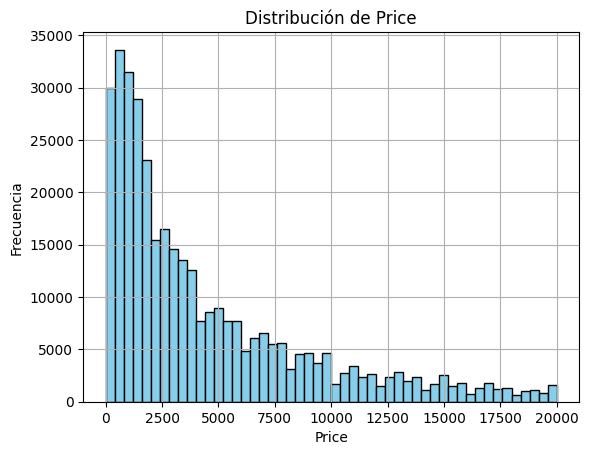

In [10]:
plt.hist(df_1['Price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución de Price')
plt.xlabel('Price')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

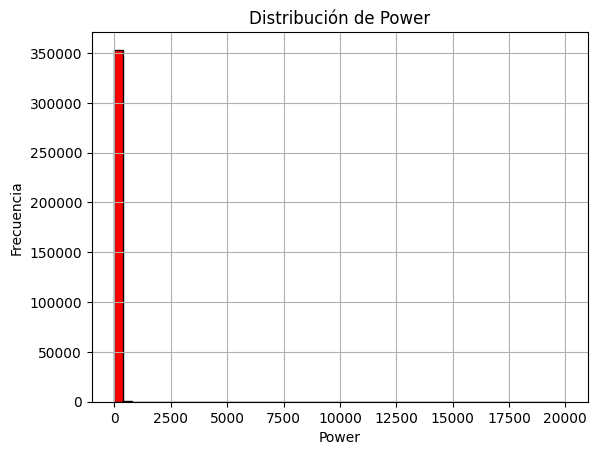

In [11]:
plt.hist(df_1['Power'], bins=50, color='red', edgecolor='black')
plt.title('Distribución de Power')
plt.xlabel('Power')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

**Se sustituyen los valores 0 por las medias de acuerdo a Brand y RegistrationDate para dar exactitud a los modelos.**

In [12]:
df_1['Power'] = df_1['Power'].replace(0, pd.NA)
df_1['Price'] = df_1['Price'].replace(0, pd.NA)

df_1['Power'] = df_1.groupby(['RegistrationYear', 'Brand'])['Power'].transform(lambda x: x.fillna(x.mean()))
df_1['Price'] = df_1.groupby(['RegistrationYear', 'Brand'])['Price'].transform(lambda x: x.fillna(x.mean()))

df_1[['Power', 'Price']].describe()

,Power,Price
count,353790.000000,354054.000000
mean,123.317164,4506.206509
std,186.567088,4478.399585
min,1.000000,1.000000
25%,80.000000,1200.000000
50%,110.000000,2800.000000
75%,147.852405,6499.000000
max,20000.000000,20000.000000


**Se eliminan valores anómalos en Power: el rango que se usará será el valor mínimo hasta 1000.**

In [13]:
df_1 = df_1[df_1['Power'] <= 1000]

df_1['Power'].describe()

count    353472.000000
mean        119.807623
std          53.443373
min           1.000000
25%          80.000000
50%         110.000000
75%         147.482091
max        1000.000000
Name: Power, dtype: float64

**Se revisa Price**

In [14]:
df_1['Price'].isnull().sum()

15

Se sustituyen valores Nan por la mediana.

In [15]:
df_1['Price'] = df_1['Price'].fillna(df_1['Price'].median())

df_1['Price'].isna().sum()

0

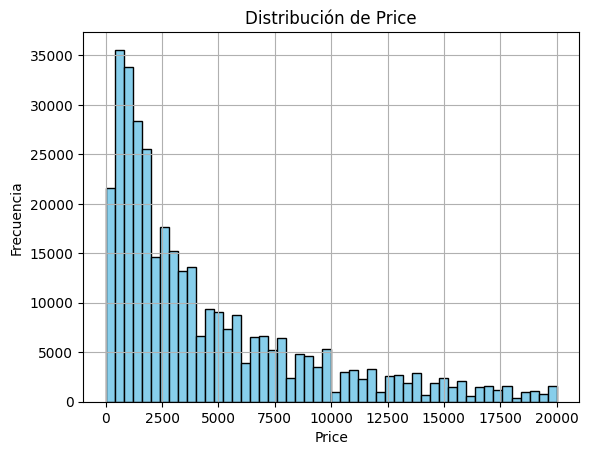

In [16]:
plt.hist(df_1['Price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución de Price')
plt.xlabel('Price')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

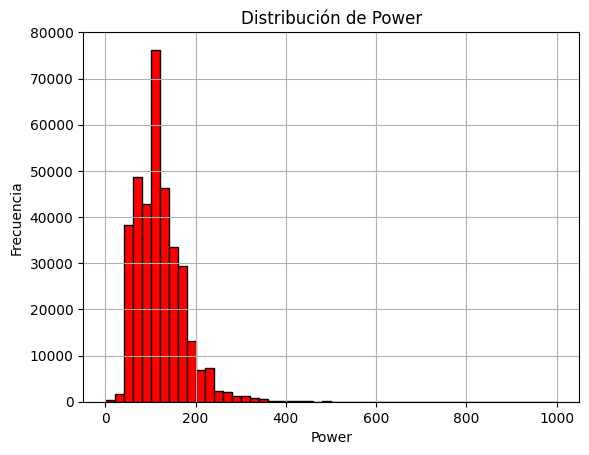

In [17]:
plt.hist(df_1['Power'], bins=50, color='red', edgecolor='black')
plt.title('Distribución de Power')
plt.xlabel('Power')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Si bien, la distribución de Price quedó parecida a la original, en Power, la distribución de caballos de fuerza cambió y se nota más uniforme. 

**Se eliminan columnas innecesarias para el análisis**

In [18]:
print(df_1['LastSeen'])

0         07/04/2016 03:16
1         07/04/2016 01:46
2         05/04/2016 12:47
3         17/03/2016 17:40
4         06/04/2016 10:17
                ...       
354364    21/03/2016 10:42
354365    06/04/2016 00:46
354366    11/03/2016 18:17
354367    07/04/2016 07:15
354368    24/03/2016 12:45
Name: LastSeen, Length: 353472, dtype: object


PostalCode, las fechas y NumberOfPictures no parecen útiles para el consecuente análisis, por lo que se dejarán fuera. Asimismo, NumberOfPictures revela 0 en los valores, por lo que no es útil. Asimismo, se eliminan Brand y Model. 

In [19]:
df_1 = df_1.drop(columns=['Brand', 'Model', 'PostalCode', 'RegistrationMonth', 'RegistrationYear', 'NumberOfPictures', 'DateCrawled', 'DateCreated', 'LastSeen'])
df_1.columns

Index(['Price', 'VehicleType', 'Gearbox', 'Power', 'Mileage', 'FuelType',
       'NotRepaired'],
      dtype='object')

In [20]:
df_1.describe()

,Price,Power,Mileage
count,353472.000000,353472.000000,353472.000000
mean,4508.638373,119.807623,128285.875543
std,4478.780664,53.443373,37801.195305
min,1.000000,1.000000,5000.000000
25%,1200.000000,80.000000,125000.000000
50%,2800.000000,110.000000,150000.000000
75%,6499.000000,147.482091,150000.000000
max,20000.000000,1000.000000,150000.000000


**A continuación, se analizarán valores problemáticos**

In [21]:
df_1 = pd.get_dummies(df_1, drop_first=True)
print(df_1.describe())

               Price          Power        Mileage  VehicleType_convertible  \
count  353472.000000  353472.000000  353472.000000            353472.000000   
mean     4508.638373     119.807623  128285.875543                 0.057034   
std      4478.780664      53.443373   37801.195305                 0.231908   
min         1.000000       1.000000    5000.000000                 0.000000   
25%      1200.000000      80.000000  125000.000000                 0.000000   
50%      2800.000000     110.000000  150000.000000                 0.000000   
75%      6499.000000     147.482091  150000.000000                 0.000000   
max     20000.000000    1000.000000  150000.000000                 1.000000   

       VehicleType_coupe  VehicleType_other  VehicleType_sedan  \
count      353472.000000      353472.000000      353472.000000   
mean            0.045608           0.009211           0.258269   
std             0.208633           0.095534           0.437684   
min             0.000000

In [22]:
df_1.isnull().sum()

Price                      0
Power                      0
Mileage                    0
VehicleType_convertible    0
VehicleType_coupe          0
VehicleType_other          0
VehicleType_sedan          0
VehicleType_small          0
VehicleType_suv            0
VehicleType_unknown        0
VehicleType_wagon          0
Gearbox_manual             0
Gearbox_unknown            0
FuelType_electric          0
FuelType_gasoline          0
FuelType_hybrid            0
FuelType_lpg               0
FuelType_other             0
FuelType_petrol            0
FuelType_unknown           0
NotRepaired_unknown        0
NotRepaired_yes            0
dtype: int64

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Ok, pero estas variables no parecen ser útiles para predecir el precio. Te recomiendo eliminarlas.

</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Antes de realizar encoding, realiza una exploración de las variables de la data. En particular, revisa si existen valores anómalos que deberíamos descartar

</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Nota que el encoding genera más de 300 columnas. Estas son demasiadas columnas, te recomiendo no considerar ni Model ni Brand para tener menos features. Cuando la dimensión de la data aumenta tanto, se vuelve difícil entrenar los algoritmos ya que el espacio crece exponencialmente. Por favor, cambia esto y prueba nuevamente los modelos.
</div>

<div class="alert alert-block alert-info">
<b>Listo, eliminé las columnas que tenían datos erróneos (NumberOfPictures) y las que se me sugirieron como innecesarias. Gracias por el feedback.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Ok, bien al remover las variables que no son útiles para la predicción porque no tienen información del proceso realmente (variables no informativas). Además, me parece bien no incluir las variables que generan muchas columnas al momento de hacer el one-hot o dummy encoding.

</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Aún falta revisar los valores anómalos o outliers de la data. Nota que hay precios 0, años de registro que no hacen sentido y power 0 también. Es importante tener la data limpia de estos valores antes de pasar a los modelos.

</div>

<div class="alert alert-block alert-info">
<b>Sustituí los valores 0 por la media en columnas de Price y Power, asimismo, eliminé los valores más altos de Power con base en una investigación que hice sobre caballos de fuerza en autos. Sin embargo, aún tengo valores 1 en ambas columnas, decidí dejarlos así puesto que al contar los valores mínimos, eran muchos y creí que si cambiaba esos también, afectaría el análisis y ejecución de mis modelos. Sin embargo, si es necesario modificarlos también (por ejemplo, en Power, todos aquellos de 0 a 50, lo haré sin problema). Gracias por el feedback preciso y quedo atento a cualquier otra modificación necesaria. Buenas noches.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor v3</b> <a class="tocSkip"></a>

Ok con el procedimiento realizado, aunque la imputación por la media de toda la data no creo que sea lo ideal, esto puede introducir un sesgo muy marcado en la data. Grafica un histograma de las variables power y price, antes y después de realizar esta imputación para observar el efecto que se generó.
    
Normalmente las imputaciones se realizan mediante grupos de la data, de forma que se reemplaza los nulos con la media del grupo al que pertenece el dato que tiene el nulo. Por ejemplo, los 0 de price se podrían reemplazar con la media de precio del año y marca. Luego en los casos que esto no sea posible porque no hay observaciones similares, entonces ahí se podría optar por la media.
        

</div>

<div class="alert alert-block alert-info">
<b>Entendido, la verdad es que no sabía que se tendría que hacer así en este caso. Usé la RegistrationDate aunque no supe si debía usar, más bien, DateCrawled. Si debo cambiarlo, quedo atento y lo hago con gusto. Los histogramas cambiaron y se distribuyó mejor en caso de Power, aunque en Price se mantuvo relativamente igual. Lo que me quedó duda fue en si sería conveniente reducir más Power en cuanto al valor máximo, cambiarlo de 1000 a 600 o incluso menos, por ejemplo, pero pienso que ahí sí necesitaría preguntar a los que solicitan la información. Empero, ya llevé a cabo los cambios requeridos, gracias por la orientación. Quedo atento a la siguiente revisión. </b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v4</b> <a class="tocSkip"></a>

OK, muy bien, ahora está mucho mejor. Respecto a los valores, efectivamente depende un poco de la naturaleza de la información, para lo cual sería bueno consultar con alguien que tenga más contexto del origen de la información. Viendo solo la data, diría que de 400 hacia arriba es un outlier.

</div>

### Segmentación

In [23]:
x = df_1.drop(['Price'], axis=1)
y = df_1['Price']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

print('El tamaño de x_train es', x_train.shape)
print('El tamaño de x_val es', x_val.shape)
print('El tamaño de y_train es', y_train.shape)
print('El tamaño de y_val es', y_val.shape)

El tamaño de x_train es (282777, 21)
El tamaño de x_val es (70695, 21)
El tamaño de y_train es (282777,)
El tamaño de y_val es (70695,)


## Entrenamiento del modelo 

### LinearRegression
Para prueba de cordura

In [24]:
x = df_1.drop(['Price'], axis=1)
y = df_1['Price']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

modelo_cordura = LinearRegression()
modelo_cordura.fit(x_train, y_train)

prediction_lineal = modelo_cordura.predict(x_val)

mse_lineal = mean_squared_error(y_val, prediction_lineal)
rmse_lineal = mse_lineal**0.5

r2_lineal = r2_score(y_val, prediction_lineal)

final_lineal = cross_val_score(modelo_cordura, x, y, cv=5).mean()

print('El valor de R2 de LinearRegression es', r2_lineal)
print('El valor de RMSE de LinearRegression es', rmse_lineal)
print('El promedio de evaluación de LinearRegression es', final_lineal)

El valor de R2 de LinearRegression es 0.5080666687709838
El valor de RMSE de LinearRegression es 3134.7012142216977
El promedio de evaluación de LinearRegression es 0.5084461141218435


Los resultados de la regresión linear nos indican que en el 50.8% de los casos, el modelo puede predecir correctamente el precio de los autos (esto con base en el valor R2 y el promedio de evaluación). Sin embargo, la gran dispersión de los datos indica que el RMSE se dispara mucho, en hasta 3134.70 del valor real.    

Una vez con estos valores para orientar los siguientes modelos, se llevará a cabo el análisis de RandomForestGenerator y DecisionTreeRegressor cada uno con uso conjunto de LightGBM y de CatBoost para mejorar los resultados obtenidos de la prueba de cordura.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v4</b> <a class="tocSkip"></a>

Muy bien, correcto el modelo como un modelo de cordura

</div>

## Análisis del modelo

### RandomForestRegressor

Se hace downsampling para ahorrar tiempo en ejecución de modelo.

In [25]:
%%time

model_forest = RandomForestRegressor(random_state=42, n_estimators=50, max_depth=10, n_jobs=-1)
model_forest.fit(x_train, y_train)

predict_forest = model_forest.predict(x_val)

mse_forest = mean_squared_error(y_val, predict_forest)
rmse_forest = mse_forest**0.5

r2_forest = r2_score(y_val, predict_forest)

print("R2 del modelo RandomForestRegressor", r2_forest)
print("El RMSE del modelo RandomForestRegressor es", rmse_forest)

R2 del modelo RandomForestRegressor 0.6593818494365327
El RMSE del modelo RandomForestRegressor es 2608.41639146485
CPU times: user 12.3 s, sys: 40.4 ms, total: 12.3 s
Wall time: 12.4 s


El modelo RandomForestRegressor nos indica por el R2, que acierta en el 65.9% de las veces. Asimismo,  su error de predicción es de 2608.63 unidades. Esto plantea una mejoría en comparación con la regresión linear.   
El tiempo total de espera fue de 13 segundos.

### LightGBM

In [26]:
%%time

categorical_cols = df_1.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_1[col] = df_1[col].astype('category')

model_light = lgb.LGBMRegressor(
    n_estimators=199, 
    learning_rate=0.05, 
    num_leaves=20, 
    max_depth=6, 
    max_bin=50, 
    subsample=0.6,
    n_jobs=-1
)

model_light.fit(x_train, y_train, eval_metric='mse',eval_set=[(x_val, y_val)], verbose=False)

predict_light = model_light.predict(x_val)

mse_light = mean_squared_error(y_val, predict_light)
rmse_light = mse_light**0.5
r2_light = r2_score(y_val, predict_light)

print("R2 del modelo LightGBM", r2_light)
print("El RMSE del modelo LightGBM es", rmse_light)

/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


R2 del modelo LightGBM 0.6535112112522543
El RMSE del modelo LightGBM es 2630.7987135136796
CPU times: user 5.97 s, sys: 16.5 ms, total: 5.99 s
Wall time: 5.98 s


El modelo LightGBM nos da una confiabilidad del 65.3% de los casos predecidos, así como un error de 2630.62 unidades. Mientras que el tiempo es de 5 segundos. El rendimiento es relativamente similar a RandomForestRegressor, excepto en el tiempo de ejecución. Se procede a cambiar hipeparámetros para mejorar el rendimiento del modelo. 

In [27]:
%%time

model_light = lgb.LGBMRegressor(
    n_estimators=250, 
    learning_rate=0.05, 
    num_leaves=50, 
    max_depth=10, 
    max_bin=200, 
    subsample=0.8,
    n_jobs=-1
)

model_light.fit(x_train, y_train, eval_metric='mse',eval_set=[(x_val, y_val)], verbose=False)

predict_light = model_light.predict(x_val)

mse_light = mean_squared_error(y_val, predict_light)
rmse_light = mse_light**0.5
r2_light = r2_score(y_val, predict_light)

print("R2 del modelo LightGBM", r2_light)
print("El RMSE del modelo LightGBM es", rmse_light)

/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


R2 del modelo LightGBM 0.6857413609271004
El RMSE del modelo LightGBM es 2505.455191801977
CPU times: user 8.96 s, sys: 43 ms, total: 9 s
Wall time: 9 s


El rendimiento de este modelo mejoró ligeramente. El R2 subió a 68.5%, el error promeido se redujo unas decenas de unidades, a 2505.45 y el tiempo de espera fue un poco mayor, de 9 segundos, lo cual es aceptable. 

### CatBoost

In [28]:
%%time

model_cat = CatBoostRegressor(iterations=100, learning_rate=0.05, depth=6, verbose=False, eval_metric='RMSE')
model_cat.fit(x_train, y_train, cat_features=categorical_cols.tolist(), eval_set=(x_val, y_val))

predict_cat = model_cat.predict(x_val)

mse_cat = mean_squared_error(y_val, predict_cat)
rmse_cat = mse_cat**0.5

r2_cat = r2_score(y_val, predict_cat)

print('R2 del modelo CatBoost es', r2_cat)
print('El RMSE del modelo CatBoost es', rmse_cat)

R2 del modelo CatBoost es 0.6299460008294739
El RMSE del modelo CatBoost es 2718.789464919995
CPU times: user 2.81 s, sys: 19.3 ms, total: 2.83 s
Wall time: 3.08 s


A continuación, se cambian parámetros para mejora del modelo.

In [29]:
%%time

model_cat = CatBoostRegressor(iterations=300, learning_rate=0.03, depth=10, l2_leaf_reg=3, verbose=0, eval_metric='RMSE')
model_cat.fit(x_train, y_train, cat_features=categorical_cols.tolist(), eval_set=(x_val, y_val))

predict_cat = model_cat.predict(x_val)

mse_cat = mean_squared_error(y_val, predict_cat)
rmse_cat = mse_cat**0.5

r2_cat = r2_score(y_val, predict_cat)

print('R2 del modelo CatBoost es', r2_cat)
print('El RMSE del modelo CatBoost es', rmse_cat)

R2 del modelo CatBoost es 0.6651198342449733
El RMSE del modelo CatBoost es 2586.352647689182
CPU times: user 12.9 s, sys: 17.1 ms, total: 12.9 s
Wall time: 13 s


El modelo CatBoos demuestra ser muy parecido al LightGBM en cuanto a resultados: la confiabilidad es de un 66.5 por ciento, el cual ha sido el segundo mejor hasta ahora, y su variabilidad promedio es de 2586.35 unidades. Asimismo, le toma poco más de 10 segundos lanzar la respuesta final. 

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Ok con la metodología, una vez corregido lo anterior, revisaré nuevamente esta parte

</div>

<div class="alert alert-block alert-info">
<b>Se llevaron a cabo los cambios solicitados. Quedo atento a cambios o retroalimentación para mejorar el proyecto.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v4</b> <a class="tocSkip"></a>

Bien hecho, muy bien con probar diferentes tipos de modelos. Otro paso ideal sería realizar una exploración de cómo afectan los parámetros de los modelos al desempeño de estos. Por ejemplo, usar diferentes valores de depth para random forest.

</div>

## Conclusión

Se recorrieron 3 diferentes modelos como prueba para este análisis. El dataset era muy amplio, se eliminaron las columnas referentes a fechas, así como Model y Brand por indicación; finalmente, se eliminó la columna NumberOfPictures dado que todos los valore seran 0. Se usó LinearRegression como prueba de cordura. Estos son los resultados:    
-Los 3 modelos analizados superaron la prueba de cordura en cuanto a resultados del R2 y el RMSE; en cuanto al tiempo de ejecución, los modelos que mostraron diferentes rangos.     
-Los tres modelos dieron resultados muy parecidos en cuanto al falor R2 y al promedio de diferencia de predicción.    
-El mejor modelo fue LightGBM en cuanto a confiabilidad, error promedio y tiempo de ejecución. CatBoost quedó muy cerca en los parámetros, el tiempo fue un poco más elevado en este modelo.
-Con base en estas métricas y análisis, el modelo más recomendable para la predicción de precio de los autos y su uso en la app, es LightGBM (a pesar de que LightGBM mostró más confiabilidad con los hiperparámetros modificados para su mejora, la diferencia fue mínima y el error promedio era mayor en ese); sin embargo, se recomienda la mejora del modelo proporcionando más información que pudiese servir para el análisis. Por ejemplo, devaluación de modelos o rendimiento de gasolina, incluso fechas de ensamblaje o tiempo de uso en meses o años. Esto podría servir para que los modelos funcionasen mejor en cuanto a su predicción final. 

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien hecho con estas conclusiones. Podrías mejorarlas incluyendo algunos valores de las métricas más importantes, así las afirmaciones realizadas estarían mejor apoyadas en hechos.
    
</div>

# Lista de control

Escribe 'x' para verificar. Luego presiona Shift+Enter

- [x]  Jupyter Notebook está abierto
- [ ]  El código no tiene errores- [ ]  Las celdas con el código han sido colocadas en orden de ejecución- [ ]  Los datos han sido descargados y preparados- [ ]  Los modelos han sido entrenados
- [ ]  Se realizó el análisis de velocidad y calidad de los modelos